In [ ]:
import numpy as np
import matplotlib.pyplot as plt

L, T, M = 1, 5, 100
c, h, dt, n = 0.05, L / 50, T / M, 50


def MakeMatrix(c,h,dt,n):
  r = c*dt/(h*h)
  A = np.zeros((n,n))
  for i in range(n-1):
    A[i,i] = 2*r + 1
    A[i,i+1] = -r
    A[i,i-1] = -r
  A[0, 0] = 1
  A[-1, -1] = 1
  A[0, -1] = 0
  A[0, 1] = 0
  return A

def solveFwd(u0,c,h,dt,n,M,last_func_only=False):
  A = MakeMatrix(c,h,dt,n)
  A_inv = np.linalg.inv(A)
  u_old = u0.copy()
  funcs = [u0]
  for i in np.arange(M):
    last_func = funcs[-1]
    new_func = A_inv @ last_func
    funcs.append( new_func )

  return funcs[-1] if last_func_only else funcs.copy()

def F_T(c, h, dt, n, M):
  A = MakeMatrix(c, h, dt, n)
  A_inv = np.linalg.inv(A)
  return np.linalg.matrix_power(A_inv, M)

I am going to make a collection of example initial functions and plot them: <br>
 - Sin wave
 - Gaussian dist
 - Middle Hot spot
 - 2 Quater Hot Spots

Generating the 4 funcs here so that my cell after (the plotting cell) its cleaner


In [ ]:
x = np.linspace(0, 1, n)


little_tent = 1 - abs(1 - 4*x)
max_func = 100*x**10*(1-x)**2 + np.maximum(little_tent, 0)

sine_func = np.sin(x*np.pi)

tent = 0.5 - abs(x - 0.5)

region1 = (x >= 0.2) & (x <= 0.4)
region2 = (x >= 0.6) & (x <= 0.8)
two_step_func = np.zeros_like(x)
two_step_func[region1] = 1
two_step_func[region2] = 1

gauss = np.exp(-100*(x-0.25)**2)

noise = np.random.normal(0, 0.01, n)
init_funcs = [
    max_func + noise,
    tent + noise,
    two_step_func + noise,
    gauss + noise,
]

# plt.plot(x, sine_func + noise)
# plt.show()

<ipython-input-3-3d1a2beef46a>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('inferno')


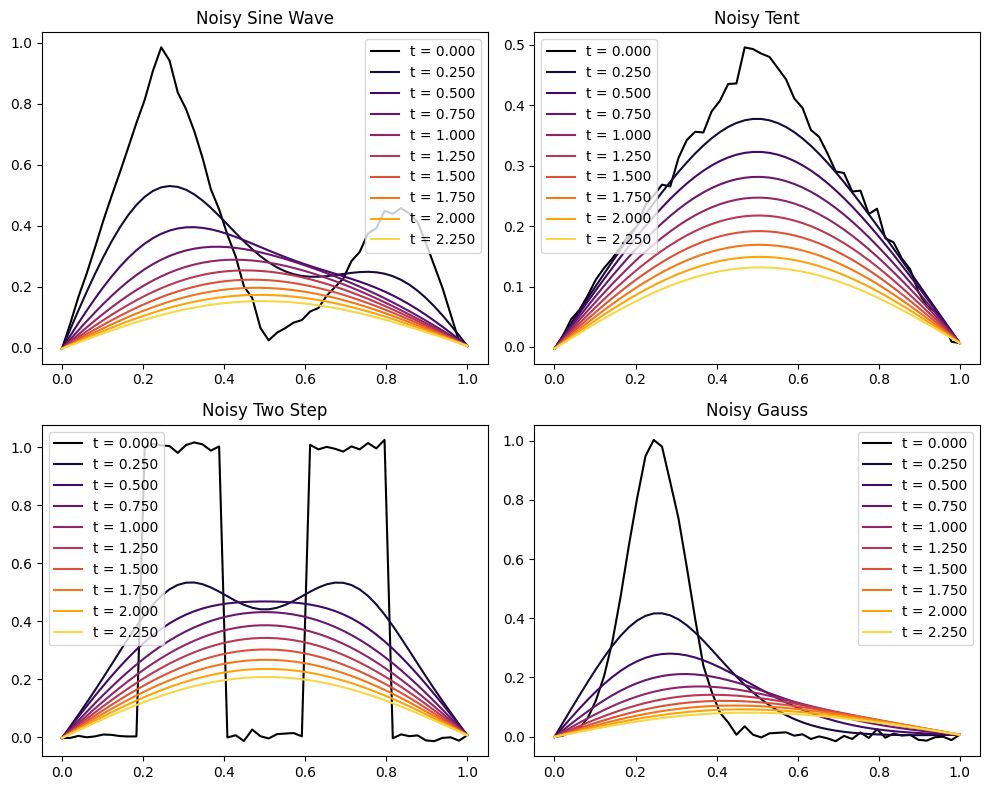

In [ ]:
import matplotlib.cm as cm
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
cmap = cm.get_cmap('inferno')

# Top-left plot
sine_sols = solveFwd(init_funcs[0], c,h,dt,n,M)
last_sine = sine_sols[-1]
for i in range(0, n, 5):
    line_color = cmap(i/n)
    axs[0, 0].plot(x, sine_sols[i], label=f't = {i*dt:.3f}',color=line_color)
axs[0, 0].set_title("Noisy Sine Wave")
axs[0, 0].legend()

# Top-right plot
tent_sols = solveFwd(init_funcs[1], c,h,dt,n,M)
last_tent = tent_sols[-1]
for i in range(0, n, 5):
    line_color = cmap(i/n)
    axs[0, 1].plot(x, tent_sols[i], label=f't = {i*dt:.3f}',color=line_color)
axs[0, 1].set_title("Noisy Tent")
axs[0, 1].legend()

# Bottom-left plot
two_step_sols = solveFwd(init_funcs[2], c,h,dt,n,M)
last_two_step = two_step_sols[-1]
for i in range(0, n, 5):
    line_color = cmap(i/n)
    axs[1, 0].plot(x, two_step_sols[i], label=f't = {i*dt:.3f}',color=line_color)
axs[1, 0].set_title("Noisy Two Step")
axs[1, 0].legend()

# Bottom-right plot
gauss_sols = solveFwd(init_funcs[-1], c,h,dt,n,M)
last_gauss = gauss_sols[-1]
for i in range(0, n, 5):
    line_color = cmap(i/n)
    axs[1, 1].plot(x, gauss_sols[i], label=f't = {i*dt:.3f}',color=line_color)
axs[1, 1].set_title("Noisy Gauss")
axs[1, 1].legend()

# Adjust layout to prevent overlap
fig.tight_layout()

# Save the figure as a PNG file
# plt.savefig("fwd_plot_w_noise_2x2.png", dpi=300)

# Show the plots (optional)
plt.show()


# Naive Inverse

In [ ]:
end_funcs = [
    solveFwd(init_funcs[0], c,h,dt,n,M,last_func_only=True),
    solveFwd(init_funcs[1], c,h,dt,n,M,last_func_only=True),
    solveFwd(init_funcs[2], c,h,dt,n,M,last_func_only=True),
    solveFwd(init_funcs[3], c,h,dt,n,M,last_func_only=True),
]

In [ ]:
def solveBwd(u_n, c, h, dt, n, last_func_only=False):
  A = MakeMatrix(c,h,dt,n)
  funcs = [u_n.copy()]

  for i in np.arange(n):
    last_func = funcs[-1]
    new_func = A @ last_func
    funcs.append(new_func)
  return funcs[-1] if last_func_only else funcs

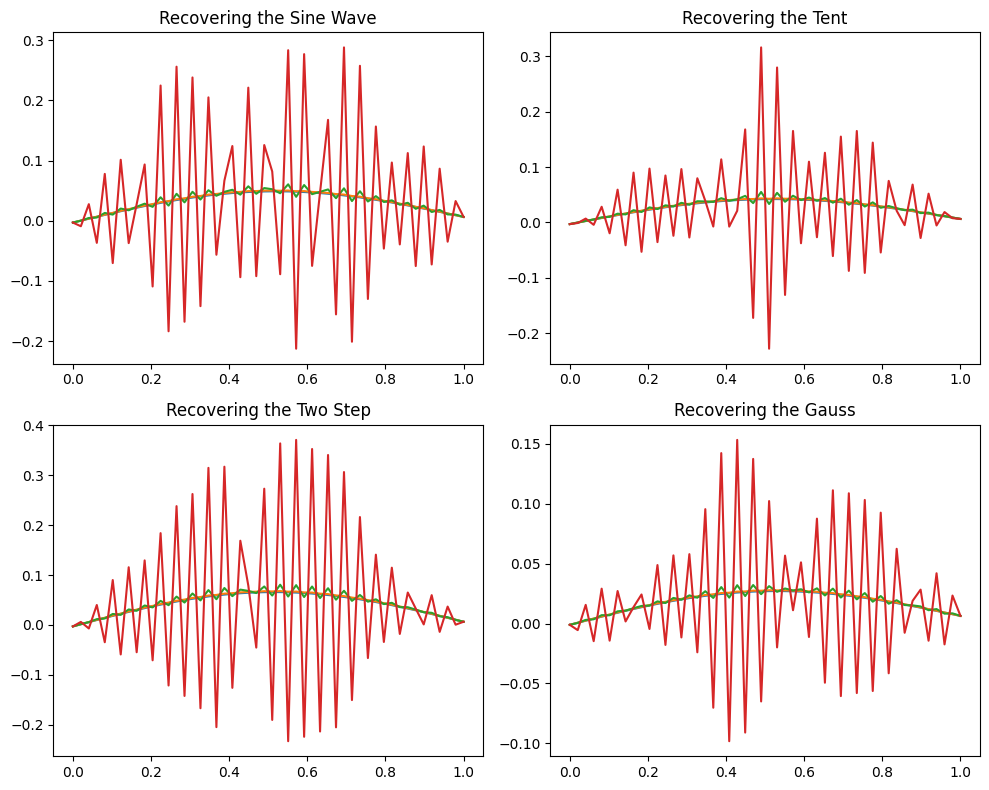

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sines_backwards = solveBwd(end_funcs[0],c,h,dt,n)
tent_backwards = solveBwd(end_funcs[1],c,h,dt,n)
two_step_backwards = solveBwd(end_funcs[2],c,h,dt,n)
gauss_backwards = solveBwd(end_funcs[3],c,h,dt,n)

for i in range(9, 13):
  axes[0,0].plot(x, sines_backwards[i])
  axes[0,1].plot(x, tent_backwards[i])
  axes[1,0].plot(x, two_step_backwards[i])
  axes[1,1].plot(x, gauss_backwards[i])

axes[0,0].set_title('Recovering the Sine Wave')
axes[0,1].set_title('Recovering the Tent')
axes[1,0].set_title('Recovering the Two Step')
axes[1,1].set_title('Recovering the Gauss')

plt.tight_layout()
plt.savefig('naive_bwd_recovery.png', dpi=300)
plt.show()


# Computing the Eigen Decomposition



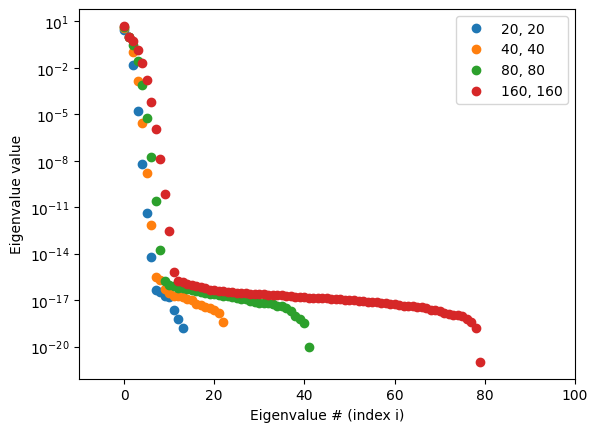

In [ ]:
def computeEigendecomposition(c,h,dt,n,M):
  F = np.zeros((n,n))
  e_i = np.zeros(n)

  for i in np.arange(n):
    e_i[i]  = 1.0
    F[:,i] = solveFwd(e_i,c,h,dt,n,M, last_func_only=True)
    e_i[i]  = 0.0

  lmbda, U = np.linalg.eigh(F)
  lmbda = lmbda[::-1]
  lmbda[lmbda < 0.] = 0.0
  U[:]  = U[:,::-1]

  return lmbda, U


# Uncommenting the bottom parameters changes
# the result of the solveFwd function.
# Trying different initial parameters

# L, c, T = 1, 0.01, 0.1
pairs = [[20, 20],[40,40],[80,80],[160,160]]

lmbda, U = computeEigendecomposition(c,h,dt,n,M)

for N, M in pairs:
  lmbda, U = computeEigendecomposition(c,h,dt,N,M)
  plt.semilogy(lmbda, 'o', label=f'{N}, {M}')

plt.xlabel(r'Eigenvalue # (index i)')
plt.ylabel('Eigenvalue value')
plt.xlim(-10, 100)
plt.legend()
plt.show()

# Using regularisation (L-curve)

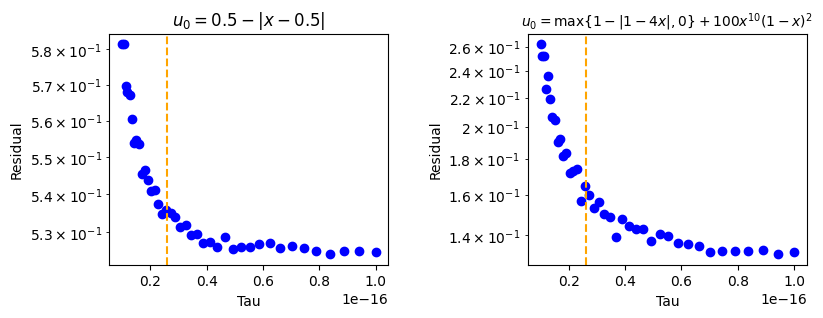

In [ ]:
from numpy.linalg import inv
from scipy.optimize import minimize

# Don't need to think about much
L = 1
c = 0.05
n = 50
h = L / n

# Need a lot of thought
M = 20
dt = 0.25
T = M * dt

fig, axs = plt.subplots(1, 2, figsize=(9, 3))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

true_u0 = np.maximum(1-abs(1-4*x),0)+100*x**10*(1-x)**2


F = F_T(c, h, dt, n, M)
u_T = F @ true_u0

def tikhonov_regularization(F, u_T, alpha):
    L = np.eye(F.shape[1])
    A_reg = F.T @ F + alpha * L
    b_reg = F.T @ u_T
    x_reg = np.linalg.solve(A_reg, b_reg)
    return x_reg

possible_alphas = np.logspace(-17, -16, 40)

for i, alpha in enumerate(possible_alphas):
  u0_regularized = tikhonov_regularization(F, u_T, alpha)
  residual = np.linalg.norm(u0_regularized - true_u0)
  axs[0].semilogy(alpha, residual, 'o', color='blue')

axs[0].axvline(0.26e-16, linestyle='--', color='orange')
axs[0].set_xlabel('Tau')
axs[0].set_ylabel('Residual')
axs[0].set_title("$u_0 = 0.5 - |x - 0.5|$", fontsize=12)

alpha = 0.26e-16
u0_regularized = tikhonov_regularization(F, u_T, alpha)

# axs[1, 0].plot(x, true_u0, label='True Solution')
# axs[1, 0].plot(x, u0_regularized, label='Regularized Solution')
# axs[1, 0].legend()
# axs[1, 0].set_title('Using the corner tau value')

# SECOND SIDE OF THE GRAPH

true_u0 = 0.5 - abs(x - 0.5) + noise

F = F_T(c, h, dt, n, M)
u_T = F @ true_u0
possible_alphas = np.logspace(-17, -16, 40)

for i, alpha in enumerate(possible_alphas):
  u0_regularized = tikhonov_regularization(F, u_T, alpha)
  residual = np.linalg.norm(u0_regularized - true_u0)
  axs[1].semilogy(alpha, residual, 'o', color='blue')

axs[1].axvline(0.26e-16, linestyle='--', color='orange')
axs[1].set_xlabel('Tau')
axs[1].set_ylabel('Residual')
axs[1].set_title(r"$u_0=\text{max} \{1-|1-4x|,0\}+100x^{10}(1-x)^2$", fontsize=10)

alpha = 0.26e-16
u0_regularized = tikhonov_regularization(F, u_T, alpha)

# axs[1, 1].plot(x, true_u0, label='True Solution')
# axs[1, 1].plot(x, u0_regularized, label='Regularized Solution')
# axs[1, 1].legend()
# axs[1, 1].set_title('Using the corner tau value')


plt.subplots_adjust(wspace=0.5)
# plt.savefig('l-curve-ridge-part-1.png',dpi=300,bbox_inches='tight')
plt.show()

0.07662331826576584
0.1678629798584549


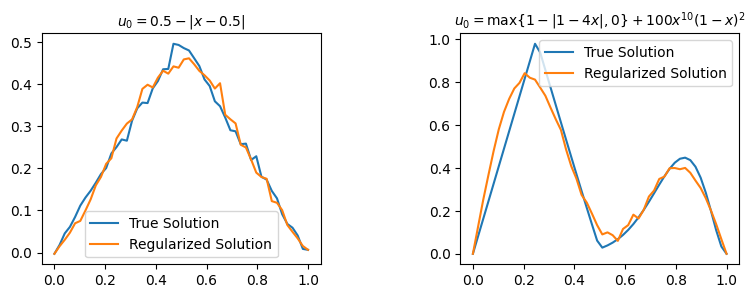

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

tau = 2.6e-17

F = F_T(c, h, dt, n, M)
true_u0 = 0.5 - abs(x - 0.5) + noise
u_t = F @ true_u0
recovered_u0 = tikhonov_regularization(F, u_t, tau)

print(np.linalg.norm(recovered_u0 - true_u0) / np.linalg.norm(true_u0))

axs[0].plot(x, true_u0, label='True Solution')
axs[0].plot(x, recovered_u0, label='Regularized Solution')
axs[0].set_title(r"$u_0 = 0.5 - |x - 0.5|$", fontsize=10)
axs[0].legend()

tau = 3.005e-17

true_u0 = np.maximum(1-abs(1-4*x),0)+100*x**10*(1-x)**2
u_t = F @ true_u0
recovered_u0 = tikhonov_regularization(F, u_t, tau)

print(np.linalg.norm(recovered_u0 - true_u0) / np.linalg.norm(true_u0))

axs[1].plot(x, true_u0, label='True Solution')
axs[1].plot(x, recovered_u0, label='Regularized Solution')
axs[1].legend()
axs[1].set_title(r"$u_0=\text{max} \{1-|1-4x|,0\}+100x^{10}(1-x)^2$", fontsize=10)

plt.subplots_adjust(wspace=0.5)
# plt.savefig('tikhonov-recover-l-curve.png',dpi=300,bbox_inches='tight')
plt.show()

# L-curve TSVD

0.08920033601452708
0.19078389484577032


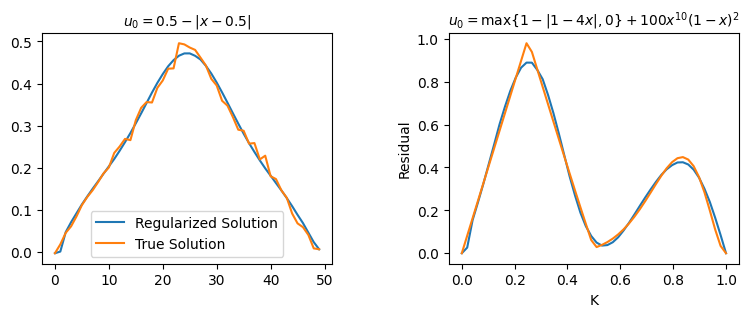

In [ ]:
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(9, 3))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

x = np.linspace(0, 1, 50)

true_u0 = 0.5 - abs(x - 0.5) + noise
F = F_T(c, h, dt, n, M)
residual = []
norms = []

k = 9

U, S, VT = np.linalg.svd(F)
u_T = F @ true_u0

Uk = U[:, :k]
Sk = np.diag(S[:k])
VkT = VT[:k, :]

Fk_inv = VkT.T @ np.linalg.inv(Sk) @ Uk.T
u0_regularized = Fk_inv @ u_T

axs[0].plot(u0_regularized, label='Regularized Solution')
axs[0].plot(true_u0, label='True Solution')
axs[0].legend()
axs[0].set_title(r"$u_0 = 0.5 - |x - 0.5|$", fontsize=10)

print(np.linalg.norm(u0_regularized - true_u0))

# SECOND PLOT

true_u0 =  np.maximum(1-abs(1-4*x),0)+100*x**10*(1-x)**2
residual.clear()
norms.clear()

k = 9
U, S, VT = np.linalg.svd(F)
u_T = F @ true_u0

Uk = U[:, :k]
Sk = np.diag(S[:k])
VkT = VT[:k, :]

Fk_inv = VkT.T @ np.linalg.inv(Sk) @ Uk.T
u0_regularized = Fk_inv @ u_T
residual.append(np.linalg.norm(u0_regularized - true_u0))
norms.append(np.linalg.norm(u0_regularized))

print(np.linalg.norm(u0_regularized - true_u0))

axs[1].plot(x, u0_regularized)
axs[1].plot(x, true_u0)
axs[1].set_xlabel('K')
axs[1].set_ylabel('Residual')
axs[1].set_title(r"$u_0=\text{max} \{1-|1-4x|,0\}+100x^{10}(1-x)^2$", fontsize=10)

# plt.savefig('l-curve-tsvd-recover.png',dpi=300,bbox_inches='tight')
plt.show()

# Regularisation (Morozov)

In [ ]:
import numpy as np
from scipy.linalg import lstsq

def morozov(A, b, lambda_vals, eta):
  residuals = []

  for lambda_val in lambda_vals:
    n = A.shape[1]
    I = np.eye(n,n)
    AtA = A.T @ A
    Atb = A.T @ b
    x_lambda = np.linalg.solve(AtA + lambda_val * I, Atb)
    residual = np.linalg.norm(A @ x_lambda - b)
    residuals.append(residual)
  residuals = np.array(residuals)
  idx_best = np.argmin(np.abs(residuals - eta))
  optmial_lambda = lambda_vals[idx_best]
  return optmial_lambda

A = F_T(c, h, dt, n, M)
b = F @ true_u0

lambda_vals = np.logspace(0, 1e10, 100)

optimal_lambda = morozov(A, b, lambda_vals, 1e-2)
print(optimal_lambda)

inf


/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:298: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)
<ipython-input-11-2cfc1ff70542>:12: RuntimeWarning: invalid value encountered in multiply
  x_lambda = np.linalg.solve(AtA + lambda_val * I, Atb)


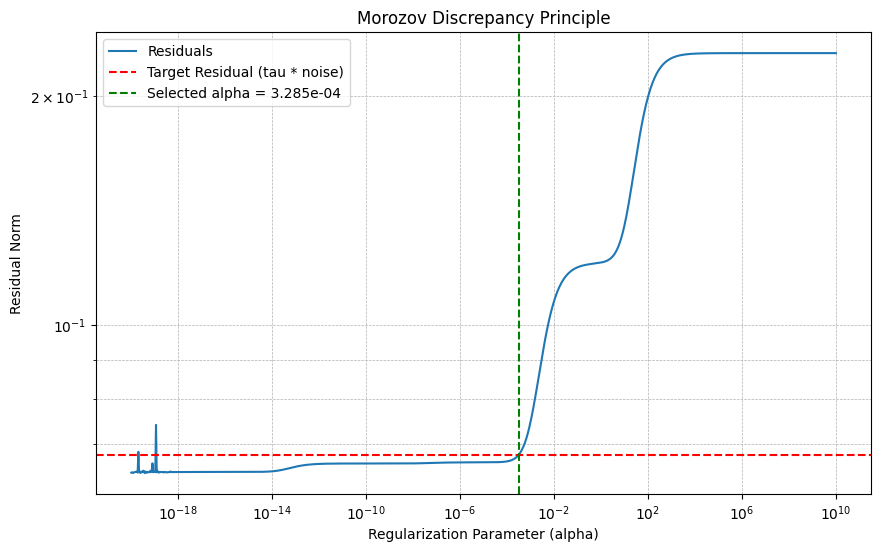

In [ ]:
import numpy as np
from scipy.linalg import lstsq
import numpy as np
import matplotlib.pyplot as plt


# Step 3: Solve for a range of alphas and compute residuals
alphas = np.logspace(-20, 10, 1000)
residuals = []
solutions = []

eta = 0.01
e = np.random.normal(0, eta, size=A.shape[0])
# x_true = 0.5 - abs(x - 0.5)
x_true = np.maximum(1-abs(1-4*x),0)+100*x**10*(1-x)**2

F = F_T(c, h, dt, n, M)
u_t = A @ x_true + e

for alpha in alphas:
    x_alpha = tikhonov_regularization(F, u_t, alpha)
    residual = np.linalg.norm(F @ x_alpha - u_t)
    residuals.append(residual)
    solutions.append(x_alpha)


tau = 1.05
target_residual =  np.linalg.norm(e)
alpha_selected = alphas[np.argmin(np.abs(np.array(residuals) - target_residual))]

# Step 5: Plot results
plt.figure(figsize=(10, 6))
plt.plot(alphas, residuals, label="Residuals")
plt.axhline(target_residual, color="r", linestyle="--", label=f"Target Residual (tau * noise)")
plt.axvline(alpha_selected, color="g", linestyle="--", label=f"Selected alpha = {alpha_selected:.3e}")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Regularization Parameter (alpha)")
plt.ylabel("Residual Norm")
plt.title("Morozov Discrepancy Principle")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()



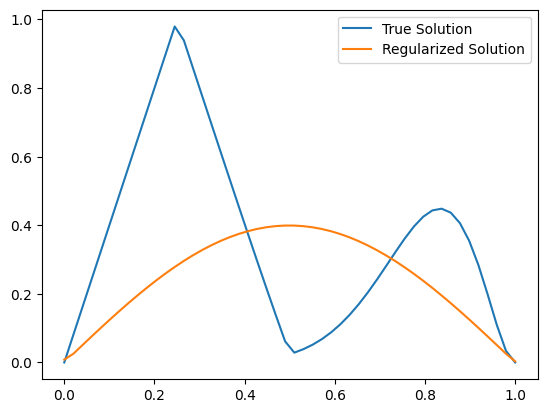

In [ ]:
u0_regularized = tikhonov_regularization(F, u_t, alpha_selected)

plt.plot(x, x_true, label='True Solution')
plt.plot(x, u0_regularized, label='Regularized Solution')
plt.legend()
plt.show()

# Trying Morozov again

In [ ]:
from scipy.optimize import minimize_scalar
import numpy as np

eta = 0.01
true_u0 = np.maximum(1-abs(1-4*x),0)+100*x**10*(1-x)**2
F = F_T(c, h, dt, n, M)
u_t = F @ true_u0

def morozov(tau, A, b, eta):
  x_tau = tikhonov_regularization(F, u_t, tau)
  residual = np.linalg.norm(F @ x_tau - u_t)
  return abs(residual - eta)

result = minimize_scalar(morozov, args=(F, u_t, eta), method='bounded', bounds=(1e-20, 1e10))
optimal_tau = result.x
print(optimal_tau)

0.00020574620979004913


0.004897837940111


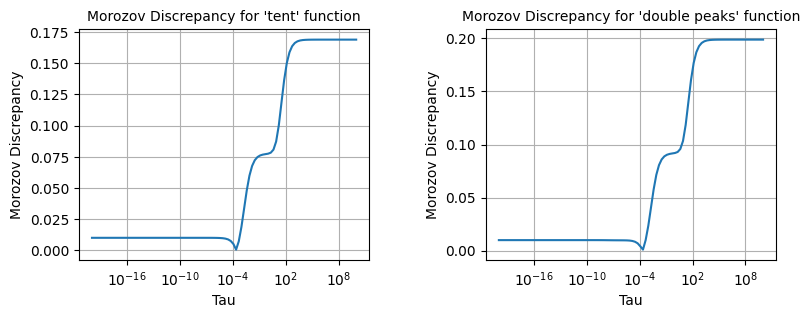

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

true_u0 = 0.5 - abs(x - 0.5)
F = F_T(c, h, dt, n, M)
u_t = F @ true_u0

tau_values = np.logspace(-20, 10, 100)  # Adjust the range as needed
discrepancies = []
for tau in tau_values:
    discrepancy = morozov(tau, F, u_T, eta)
    discrepancies.append(discrepancy)

import matplotlib.pyplot as plt

axs[0].plot(tau_values, discrepancies)
axs[0].set_xscale('log')  # Use a logarithmic scale for tau
axs[0].set_xlabel('Tau')
axs[0].set_ylabel('Morozov Discrepancy')
axs[0].set_title("Morozov Discrepancy for 'tent' function", fontsize=10)
axs[0].grid(True)

true_u0 = np.maximum(1-abs(1-4*x),0)+100*x**10*(1-x)**2
F = F_T(c, h, dt, n, M)
u_t = F @ true_u0

tau_values = np.logspace(-20, 10, 100)  # Adjust the range as needed
discrepancies = []
for tau in tau_values:
    discrepancy = morozov(tau, F, u_T, eta)
    discrepancies.append(discrepancy)

import matplotlib.pyplot as plt

print(morozov(0.0001, F, u_t, eta))

axs[1].plot(tau_values, discrepancies)
axs[1].set_xscale('log')  # Use a logarithmic scale for tau
axs[1].set_xlabel('Tau')
axs[1].set_ylabel('Morozov Discrepancy')
axs[1].set_title("Morozov Discrepancy for 'double peaks' function", fontsize=10)
axs[1].grid(True)

# plt.savefig('morozov-discrepancy-tik.png',dpi=300,bbox_inches='tight')
plt.show()

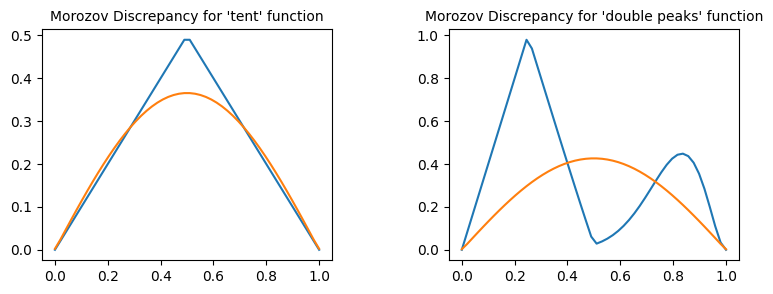

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

true_u0 = 0.5 - abs(x - 0.5)
F = F_T(c, h, dt, n, M)
u_t = F @ true_u0
u0_regularized = tikhonov_regularization(F, u_t, optimal_tau)

axs[0].plot(x, true_u0, label='True Solution')
axs[0].plot(x, u0_regularized, label='Regularized Solution')
axs[0].set_title("Morozov Discrepancy for 'tent' function", fontsize=10)


true_u0 = np.maximum(1-abs(1-4*x),0)+100*x**10*(1-x)**2
F = F_T(c, h, dt, n, M)
u_t = F @ true_u0
u0_regularized = tikhonov_regularization(F, u_t, optimal_tau)

axs[1].plot(x, true_u0, label='True Solution')
axs[1].plot(x, u0_regularized, label='Regularized Solution')
axs[1].set_title("Morozov Discrepancy for 'double peaks' function", fontsize=10)

plt.savefig("morozov-recovery.png", dpi=300, bbox_inches='tight')
plt.show()

# L-Curve and TSVD

In [ ]:
from numpy.linalg import svd

true_u0 = 0.5 - abs(x - 0.5)
F = F_T(c, h, dt, n, M)
u_t = F @ true_u0

def tsvd(F, u_t, k):
  U, S, VT = svd(F)
  Uk = U[:, :k]
  Sk = np.diag(S[:k])
  VkT = VT[:k, :]
  return VkT.T @ np.linalg.inv(Sk) @ Uk.T

for k in range(0, 50):
  u0_regularized = tsvd(F, u_t, k)
  residual = np.linalg.norm(u0_regularized - true_u0)
  # plt.semilogy(k, residual, 'o', color='blue')

u0_regularized = tsvd(F, u_t, 40)
residual = np.linalg.norm(u0_regularized - true_u0)

# Morozov n TSVD

<ipython-input-19-00194cfa034d>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('inferno')


Optimal k: 50


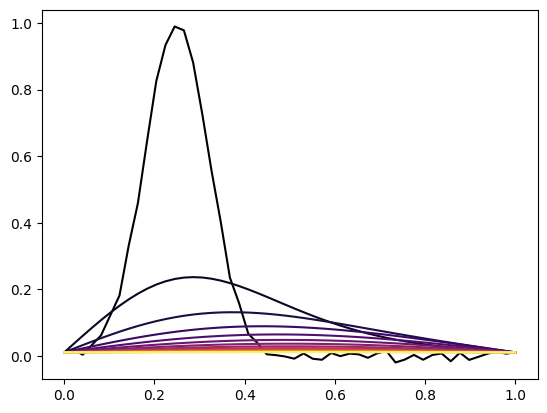

In [ ]:
F = F_T(c, h, dt, 50, 50)
eta = 0.01
noise = np.random.normal(0, eta, size=50)
u0 = np.exp(-100*(x-0.25)**2) + noise
delta = eta * 1.5
cmap = cm.get_cmap('inferno')

for m in range(0, 50, 3):
  F = F_T(c, h, dt, 50, m)
  u_t = F @ u0
  plt.plot(x, u_t,color=cmap(m/50))


import numpy as np
def morozov_tsvd(A, b, delta):
    # Perform SVD
    U, Sigma, Vt = np.linalg.svd(A, full_matrices=False)
    V = Vt.T

    # Initialize variables
    n = len(Sigma)
    residuals = []
    x_k = np.zeros(A.shape[1])

    # Iterate over truncation indices
    for k in range(1, n + 1):
        # Compute TSVD solution x_k
        x_k = sum((np.dot(U[:, i], b) / Sigma[i]) * V[:, i] for i in range(k))

        # Compute residual
        residual = np.linalg.norm(A @ x_k - b)
        residuals.append(residual)

        # Check Morozov discrepancy principle
        if residual > delta:
            return k - 1, x_k  # Return the largest k satisfying the criterion

    return n, x_k  # If all k satisfy the criterion

k_opt, x_opt = morozov_tsvd(F, u_t, delta)
print(f"Optimal k: {k_opt}")


# Final plot

In [ ]:
def tsvd(F, u_t, k):
  U, S, Vt = np.linalg.svd(F)
  Uk = U[:, :k]
  Sk = np.diag(S[:k])
  VkT = VT[:k, :]


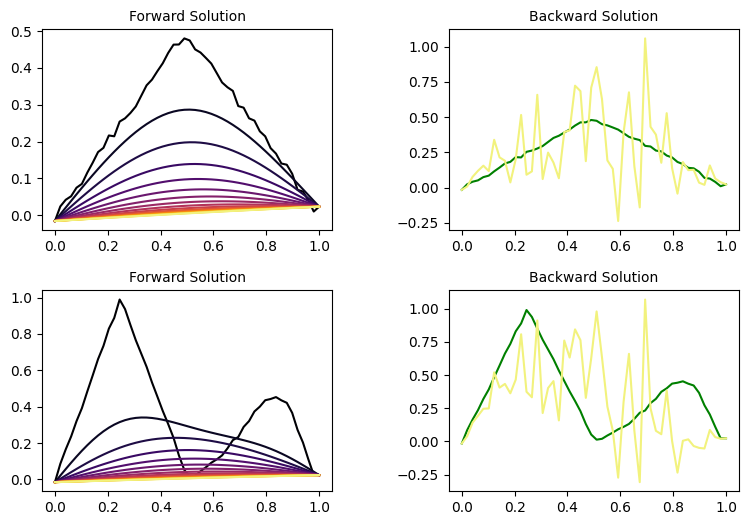

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(9, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

n, M = 50, 50
noise = np.random.normal(0, 0.01, size=n)
init_funcs = [
  0.5 - abs(x - 0.5) + noise,
  np.maximum(1-abs(1-4*x),0)+100*x**10*(1-x)**2 + noise
]
alpha = 3.6e-20


def tsvd(F, u_t, k):
    L = np.eye(F.shape[1])
    A_reg = F.T @ F + alpha * L
    b_reg = F.T @ u_T
    x_reg = np.linalg.solve(A_reg, b_reg)
    return x_reg

for i, true_u0 in enumerate(init_funcs):
  for m in range(0, M, 3):
    F = F_T(c, h, dt, n, m)
    u_t = F @ true_u0
    axs[i, 0].plot(x, u_t, color=cmap(m/M))
    axs[i, 0].set_title("Forward Solution", fontsize=10)

  F = F_T(c, h, dt, n, M)
  axs[i, 1].plot(x, true_u0, color='g')
  u_t = F @ true_u0
  u0_regularized = tikhonov_regularization(F, u_t, alpha)
  axs[i, 1].plot(x, u0_regularized, color=cmap(m/M))
  axs[i, 1].set_title("Backward Solution", fontsize=10)
